In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [15]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Define model architecture

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [19]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [20]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5491 - accuracy: 0.4323 - val_loss: 1.2538 - val_accuracy: 0.5539
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1678 - accuracy: 0.5879 - val_loss: 1.1126 - val_accuracy: 0.6053
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0096 - accuracy: 0.6431 - val_loss: 1.0412 - val_accuracy: 0.6367
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9070 - accuracy: 0.6812 - val_loss: 0.9806 - val_accuracy: 0.6532
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8420 - accuracy: 0.7051 - val_loss: 0.9654 - val_accuracy: 0.6584
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7789 - accuracy: 0.7251 - val_loss: 0.8960 - val_accuracy: 0.6915
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7248 - accuracy: 0.7466 - val_loss: 0.9359 - val_accuracy:

313/313 - 0s - loss: 0.8646 - accuracy: 0.7106 - 445ms/epoch - 1ms/step


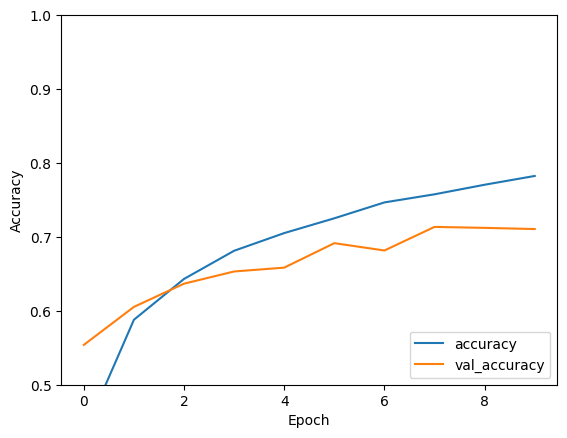

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Save model

In [22]:
tf.saved_model.save(model, "../saved_models/cifar")

INFO:tensorflow:Assets written to: ../saved_models/cifar/assets


INFO:tensorflow:Assets written to: ../saved_models/cifar/assets


### Convert to Tflite

In [23]:
converter = tf.lite.TFLiteConverter.from_saved_model("../saved_models/cifar")
tflite_model = converter.convert()

2022-12-29 07:45:14.349886: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-29 07:45:14.349908: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-29 07:45:14.350013: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: ../saved_models/cifar
2022-12-29 07:45:14.351531: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-29 07:45:14.351543: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: ../saved_models/cifar
2022-12-29 07:45:14.355592: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-29 07:45:14.391333: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: ../saved_models/cifar
2022-12-29 07:45:14.402042: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: success: O

### Save converted model

In [24]:
with open('../saved_models/cifar_lite/model.tflite', 'wb') as f:
  f.write(tflite_model)